# <h1 style="color:#008000;font-size:50px">Project 5 - Electricity Consumption Segmentation and Prediction<h1>


<h2 style="color:#8B0000;"> Imported All the necessary libraries namely:</h2>
        
        - numpy
        - matplotlib
        - pyplot
        - pandas
        - KMeans and AgglomerativeClustering

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans, AgglomerativeClustering

<h3 style="color:#8B0000;"> Read the Data set and store it in a pandas Data Frame named as 'data' :</h3>

In [45]:
rawdata = pd.read_csv('daily_electricity_usage.csv')
# Convert the date column to date-type
rawdata['date'] = pd.to_datetime(rawdata['date'])


# Creating a new dataframe with dates corresponding to the rawdata dataframe:
data = pd.pivot_table(rawdata, index=['date'], columns=['Meter ID'])

<h3 style="color:#8B0000;"> Display the first Five rows of the data set :</h3>

In [46]:
rawdata.head()

,Meter ID,date,total daily KW
0,1000,2009-07-14,11.203
1,1000,2009-07-15,8.403
2,1000,2009-07-16,7.225
3,1000,2009-07-17,11.338
4,1000,2009-07-18,11.306


<h3 style="color:#8B0000;"> Finding Missing values and filling the missing values:</h3>

In [47]:
# Number of missing data:
data.isnull().sum().sum()

157902

In [48]:
# Number of missing data:
data.isnull().sum().sort_values(ascending=False)[:30]

                Meter ID
total daily KW  2326        535
                2155        535
                2642        535
                4436        535
                1396        535
                7426        535
                2660        535
                5252        535
                1589        535
                4898        534
                1358        533
                1489        533
                4881        532
                5695        532
                2425        532
                5849        530
                5341        529
                6296        529
                4647        529
                3779        528
                4435        528
                2659        527
                2517        527
                6862        527
                2766        526
                1805        526
                3254        525
                6675        522
                5759        522
                3719        522
dtype: int64

### This is a lot of missing days, when total days in the period are 536 days. We need to handle these missing values.

In [49]:
# Number of days in the dataset:
data.shape[0]

536

<h3 style="color:#8B0000;"> Drop the attribute level of pivot table:</h3>

In [50]:
# Drop the attribute level of our pivot table:
data.columns = data.columns.droplevel()

In [51]:
# Removing MeterIDs where 75 percent of the days are missing:
ncols = data.shape[0] # number of rows
npercent_col = int(0.5 * ncols)
data.dropna(axis=1, thresh=npercent_col, inplace=True)

# Number of missing data:
meterIDswithmeanvalues = data.isnull().sum().sort_values(ascending=False)[:500].index

# If there is remaining MeterIDs with missing values after this cleansing,
# fil the missing data with it's mean value:
data.fillna(data.mean(), inplace=True)

# We are missing 10 MeterIDs from the number 6445, 
# because this ten is never recorded in the dataset. 
# We chosed to not have this ten in our dataset.
data.head()

Meter ID,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,7435,7436,7437,7438,7439,7440,7441,7442,7443,7444
date,,,,,,,,,,,,,,,,,,,,,
2009-07-14,11.203,6.744,6.355,24.183,50.057,17.765,12.056,30.399,27.217,51.865,...,15.643,36.500,15.346,0.732,138.130,41.813,14.491,36.813,5.112,52.940
2009-07-15,8.403,6.949,8.972,26.659,48.813,19.801,17.169,23.976,31.996,42.740,...,14.667,29.443,26.156,0.685,115.893,31.572,12.597,40.492,18.233,35.582
2009-07-16,7.225,7.255,8.794,32.017,32.555,15.216,16.260,34.534,24.363,56.390,...,18.037,28.786,23.945,0.707,127.698,32.618,15.816,41.487,6.925,29.307
2009-07-17,11.338,7.190,8.306,33.032,46.727,23.418,14.813,19.251,23.122,43.604,...,11.512,31.394,23.118,0.655,142.211,36.614,13.162,43.986,5.370,40.986
2009-07-18,11.306,6.805,10.119,31.238,35.215,29.392,12.325,21.392,25.721,41.581,...,30.767,22.112,15.582,0.682,4.641,27.982,13.301,41.018,6.751,40.270


<h3 style="color:#8B0000;"> Setting the Meter ID column as index and adding new columns (Total KW, Average daily KW, Xmas day KW):</h3>

In [52]:
# List of Unique MeterIDs:
meterIDs = data.columns.unique()
 
percentages = pd.DataFrame({'Meter ID':meterIDs})
# Convert the Meter ID column to the index:
percentages.set_index('Meter ID', inplace=True)
# Adding a new column describing total KW per user:

percentages['Total KW'] = data.sum(axis=0).values
percentages['Average daily KW'] = percentages['Total KW'] / len(data.index)
#percentages['Xmas day KW'] = (data.loc['2009-12-25'] + data.loc['2010-12-25']) / 2

<h3 style="color:#8B0000;"> Adding weekdays % columns to the dataframe:</h3>

In [53]:
# The below code is loosely based on this stackoverflow answer:
# https://stackoverflow.com/questions/21774089/selecting-rows-with-a-certain-weekday-in-dataframe-in-python
# The specific days in a week:
percentages['% Monday'] = data[data.index.weekday==0].sum().values / percentages['Total KW'] * 100
percentages['% Tuesday'] = data[data.index.weekday==1].sum().values / percentages['Total KW'] * 100
percentages['% Wednesday'] = data[data.index.weekday==2].sum().values / percentages['Total KW'] * 100
percentages['% Thursday'] = data[data.index.weekday==3].sum().values / percentages['Total KW'] * 100
percentages['% Friday'] = data[data.index.weekday==4].sum().values / percentages['Total KW'] * 100
percentages['% Saturday'] = data[data.index.weekday==5].sum().values / percentages['Total KW'] * 100
percentages['% Sunday'] = data[data.index.weekday==6].sum().values / percentages['Total KW'] * 100

# Weekdays and weekends:
percentages['% Weekday'] = data[(data.index.weekday != 5) & (data.index.weekday != 6)].sum().values / percentages['Total KW'] * 100
percentages['% Weekend'] = data[(data.index.weekday == 5) | (data.index.weekday == 6)].sum().values / percentages['Total KW'] * 100

percentages.head()

,Total KW,Average daily KW,% Monday,% Tuesday,% Wednesday,% Thursday,% Friday,% Saturday,% Sunday,% Weekday,% Weekend
Meter ID,,,,,,,,,,,
1000,5515.675,10.290438,13.818961,14.649395,14.792587,12.848944,13.900039,15.455497,14.534576,70.009926,29.990074
1001,5090.375,9.496968,14.126091,14.361830,14.289969,14.611595,14.851637,13.891904,13.866974,72.241122,27.758878
1002,5352.830,9.986623,15.714585,14.486150,16.015827,15.183408,13.964968,12.886305,11.748757,75.364938,24.635062
1003,16305.581,30.420860,14.545051,14.048454,14.216507,14.363180,14.000151,14.630714,14.195943,71.173342,28.826658
1004,25326.442,47.250825,14.630796,14.177041,14.400305,13.674076,12.893055,14.671563,15.553164,69.775273,30.224727


<h3 style="color:#8B0000;"> Adding seasons % columns to the data fram:</h3>

In [54]:
percentages['% Winter Season'] = data[(data.index.month < 3) | (data.index.month == 12)].sum().values / percentages['Total KW'] * 100
percentages['% Spring Season'] = data[(data.index.month > 2) & (data.index.month < 6)].sum().values / percentages['Total KW'] * 100
percentages['% Summer Season'] = data[(data.index.month > 5) & (data.index.month < 9)].sum().values / percentages['Total KW'] * 100
percentages['% Fall Season'] = data[(data.index.month > 8) & (data.index.month < 12)].sum().values / percentages['Total KW'] * 100

percentages.head()

,Total KW,Average daily KW,% Monday,% Tuesday,% Wednesday,% Thursday,% Friday,% Saturday,% Sunday,% Weekday,% Weekend,% Winter Season,% Spring Season,% Summer Season,% Fall Season
Meter ID,,,,,,,,,,,,,,,
1000,5515.675,10.290438,13.818961,14.649395,14.792587,12.848944,13.900039,15.455497,14.534576,70.009926,29.990074,30.476306,14.259488,21.492891,33.771315
1001,5090.375,9.496968,14.126091,14.361830,14.289969,14.611595,14.851637,13.891904,13.866974,72.241122,27.758878,50.429094,10.206615,13.299610,26.064681
1002,5352.830,9.986623,15.714585,14.486150,16.015827,15.183408,13.964968,12.886305,11.748757,75.364938,24.635062,24.733328,16.235954,25.775879,33.254839
1003,16305.581,30.420860,14.545051,14.048454,14.216507,14.363180,14.000151,14.630714,14.195943,71.173342,28.826658,26.021397,18.654803,22.251694,33.072106
1004,25326.442,47.250825,14.630796,14.177041,14.400305,13.674076,12.893055,14.671563,15.553164,69.775273,30.224727,23.684286,15.229194,25.529978,35.556542


## Reseting the index:

In [55]:
dfWithIndex = percentages.copy()
dfWithIndex.reset_index(inplace = True)
dfWithIndex.head()

,Meter ID,Total KW,Average daily KW,% Monday,% Tuesday,% Wednesday,% Thursday,% Friday,% Saturday,% Sunday,% Weekday,% Weekend,% Winter Season,% Spring Season,% Summer Season,% Fall Season
0,1000,5515.675,10.290438,13.818961,14.649395,14.792587,12.848944,13.900039,15.455497,14.534576,70.009926,29.990074,30.476306,14.259488,21.492891,33.771315
1,1001,5090.375,9.496968,14.126091,14.361830,14.289969,14.611595,14.851637,13.891904,13.866974,72.241122,27.758878,50.429094,10.206615,13.299610,26.064681
2,1002,5352.830,9.986623,15.714585,14.486150,16.015827,15.183408,13.964968,12.886305,11.748757,75.364938,24.635062,24.733328,16.235954,25.775879,33.254839
3,1003,16305.581,30.420860,14.545051,14.048454,14.216507,14.363180,14.000151,14.630714,14.195943,71.173342,28.826658,26.021397,18.654803,22.251694,33.072106
4,1004,25326.442,47.250825,14.630796,14.177041,14.400305,13.674076,12.893055,14.671563,15.553164,69.775273,30.224727,23.684286,15.229194,25.529978,35.556542


<h3 style="color:#8B0000;"> Make a  copy of the previous data frame and name it as 'df':</h3>

In [56]:
df = percentages.copy()
x_calls = df.columns
df.head()

,Total KW,Average daily KW,% Monday,% Tuesday,% Wednesday,% Thursday,% Friday,% Saturday,% Sunday,% Weekday,% Weekend,% Winter Season,% Spring Season,% Summer Season,% Fall Season
Meter ID,,,,,,,,,,,,,,,
1000,5515.675,10.290438,13.818961,14.649395,14.792587,12.848944,13.900039,15.455497,14.534576,70.009926,29.990074,30.476306,14.259488,21.492891,33.771315
1001,5090.375,9.496968,14.126091,14.361830,14.289969,14.611595,14.851637,13.891904,13.866974,72.241122,27.758878,50.429094,10.206615,13.299610,26.064681
1002,5352.830,9.986623,15.714585,14.486150,16.015827,15.183408,13.964968,12.886305,11.748757,75.364938,24.635062,24.733328,16.235954,25.775879,33.254839
1003,16305.581,30.420860,14.545051,14.048454,14.216507,14.363180,14.000151,14.630714,14.195943,71.173342,28.826658,26.021397,18.654803,22.251694,33.072106
1004,25326.442,47.250825,14.630796,14.177041,14.400305,13.674076,12.893055,14.671563,15.553164,69.775273,30.224727,23.684286,15.229194,25.529978,35.556542


<h3 style="color:#8B0000;"> How many rows and columns in the data frame 'df':</h3>

In [57]:
df.shape

(6188, 15)

<h3 style="color:#8B0000;"> What are the data types of the columns in the data frame:</h3>

In [58]:
df.dtypes

Total KW            float64
Average daily KW    float64
% Monday            float64
% Tuesday           float64
% Wednesday         float64
% Thursday          float64
% Friday            float64
% Saturday          float64
% Sunday            float64
% Weekday           float64
% Weekend           float64
% Winter Season     float64
% Spring Season     float64
% Summer Season     float64
% Fall Season       float64
dtype: object

<h3 style="color:#8B0000;"> Scaled our data using MinMaxScaler scaler:</h3>
Whenever we perform clustering it is always a good idea to scale out our data to give equal importance to all the variables, in this way we can avoid misinterpretation of the clustering algorithm to make the clusters. As our data consists of continious values hence we prefer to use MinMaxScaler to serve the purpose.

In [59]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(df)
df_transformed = mms.transform(df)
mms = MinMaxScaler()
mms.fit(dfWithIndex)
df_transformed2 = mms.transform(dfWithIndex)

C:\Users\Hakon\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Justification for the choice regarding the Clustering Algorithm we used:

<h3 style="color:#8B0000;"> We have chosen to use 'Kmeans' clustering algorithm from scikit-learn library:</h3>
K-Means Clustering is an unsupervised machine learning algorithm. In contrast to traditional supervised machine learning algorithms, K-Means attempts to classify data without having first been trained with labeled data. Once the algorithm has been run and the groups are defined, any new data can be easily assigned to the most relevant group.
<h3 style="color:#8B0000;"> How Kmeans work:</h3>
- Select K (i.e. 2) random points as cluster centers called centroids
-  Assign each data point to the closest cluster by calculating its distance with respect to each centroid
- Determine the new cluster center by computing the average of the assigned points
-  Repeat steps 2 and 3 until none of the cluster assignments change
<h3 style="color:#8B0000;"> Why Kmeans:</h3>

- K-means algorithm is Relatively simple to implement.
- With the large data set,  K-Means most of the times works computationally faster than hierarchical clustering
- K-Means produce tighter clusters than hierarchical clustering
- Generalizes to clusters of different shapes and sizes, such as elliptical clusters.
##### Keeping the points discussed above we decide to use Kmeans clustering from scikit-learn library.

# Validation of the choice regarding number of Clusters  used, using a suitable technique:

Discovering the number of clusters is a challenge especially when we are dealing with unsupervised machine learning and clustering algorithms. To solve the issue of “how many clusters should I choose” we have used two  methods namely:
- The Elbow Method
- The Silhouette Method

<h3 style="color:#8B0000;"> The Elbow Method:</h3>
In the Elbow method, we initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre.</n>
As k increases, the sum of squared distance tends to zero. Imagine we set k to its maximum value n (where n is number of samples) each sample will form its own cluster meaning sum of squared distances equals zero.</n>
we plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.


##### Finding the Sum_of_squared_distances:

In [60]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_transformed)
    Sum_of_squared_distances.append(km.inertia_)

##### Ploting the Sum_of_squared_distances:

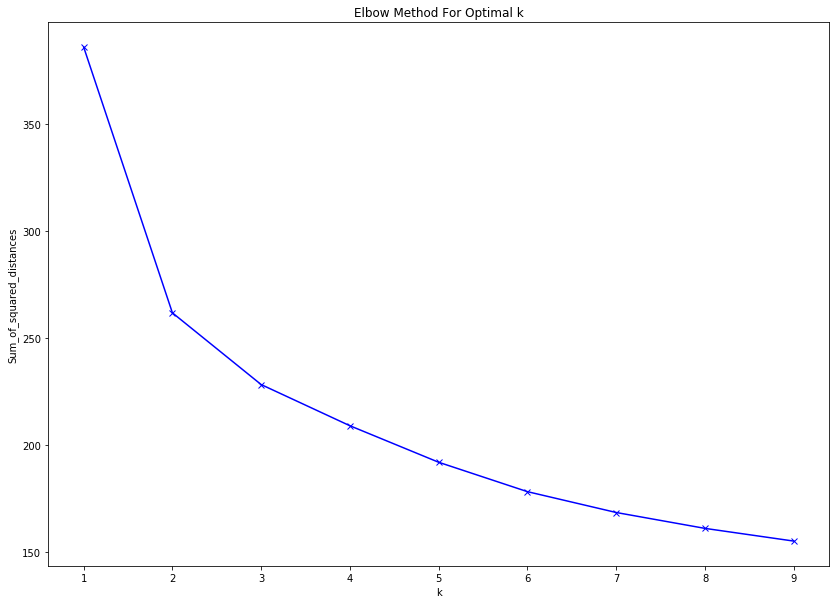

In [61]:
fig, ax = plt.subplots(figsize = (14,10))
fig.set_facecolor('w')
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

##### As in the above plot we can see the plot is like an arm and elbow is at 2 hence the optimal number of clusters in our case is 2:

<h3 style="color:#8B0000;"> The Silhouette Method:</h3>
 The silhouette_score gives the average value for all the samples.
 This gives a perspective into the density and separation of the formed clusters. this technique provides a succinct graphical representation of how well each object has been classified. <br>
 The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters


##### Finding Silhouette Scores:

In [62]:
from sklearn.metrics import silhouette_score
range_n_clusters = np.arange(2,10)
sil1, sil2 = [], []
# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range_n_clusters:
    kmeans = KMeans(n_clusters = k).fit(df_transformed)
    labels = kmeans.labels_
    sil1.append(silhouette_score(df_transformed, labels, metric = 'euclidean'))
for k in range_n_clusters:
    kmeans = AgglomerativeClustering(k).fit(df_transformed)
    labels = kmeans.labels_
    sil2.append(silhouette_score(df_transformed, labels, metric = 'euclidean'))

#####  Plotting  the results: 

Text(0.5, 1.0, '(Cosine similarity) Hierarchical: Silhouette Scores by Number of Clusters')

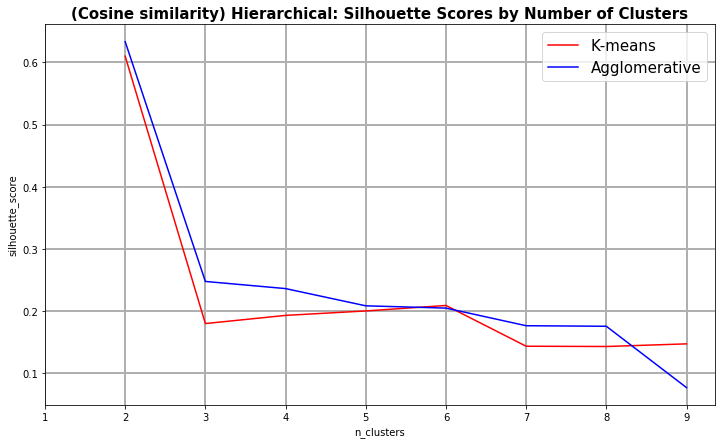

In [63]:
fig, ax = plt.subplots(figsize = (12,7))
fig.set_facecolor('w')
plt.rcParams['font.size'] = 15
plt.plot(range_n_clusters, sil1, label='K-means', c='red')
plt.plot(range_n_clusters, sil2, label='Agglomerative', c='blue')
plt.legend(loc='best')
plt.xlabel('n_clusters')
ax.set_xticks(np.arange(1, max(range_n_clusters)+1, step=1)) 
plt.ylabel('silhouette_score')
plt.grid(linestyle='-', linewidth=2)
plt.title('(Cosine similarity) Hierarchical: Silhouette Scores by Number of Clusters',fontweight='bold', fontsize=15)

##### As The Highest Silhoutte score gained by the number of cluster is 2, hence the optimal number of cluster is 2, this also confirms the number of clusters given by "Elbow Method".

<h3 style="color:#8B0000;">Hence we Import KMeans from sklearn and fit it using k=2 clusters on our data set:</h3>

In [64]:
km2 = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
km2 = km2.fit(df_transformed2)

<h3 style="color:#8B0000;">The centroid values generated by the algorithm:</h3>


In [65]:
km2.cluster_centers_

array([[0.2501326 , 0.03574837, 0.03574837, 0.40285543, 0.38408763,
        0.45705737, 0.55254328, 0.46698849, 0.511968  , 0.32798539,
        0.45840747, 0.54159253, 0.36110183, 0.28244719, 0.32961624,
        0.38282859],
       [0.74996888, 0.03490175, 0.03490175, 0.40318207, 0.384844  ,
        0.4577215 , 0.5532153 , 0.46945075, 0.51049729, 0.32639676,
        0.46049497, 0.53950503, 0.36147771, 0.28152756, 0.32989825,
        0.38289939]])

<h3 style="color:#8B0000;"> The labels for each  data point belongs to:</h3>


In [66]:
print(km.labels_)

[2 1 8 ... 2 2 2]


<h3 style="color:#8B0000;"> The unique values of  clusters labels:</h3>


In [67]:
pd.Series(km.labels_).unique()

array([2, 1, 8, 3, 0, 6, 5, 7, 4], dtype=int64)

# Illustrate the differences among the clusters based on distinguishing features (Use plotting and Visualization Techniques)

<h3 style="color:#8B0000;"> Let's plot the data points again on the graph and visualize how the data has been clustered:</h3>
Here we are plotting the first column of the Data frame against the second column, This time we will plot the data along with their assigned label so that we can distinguish between the clusters.

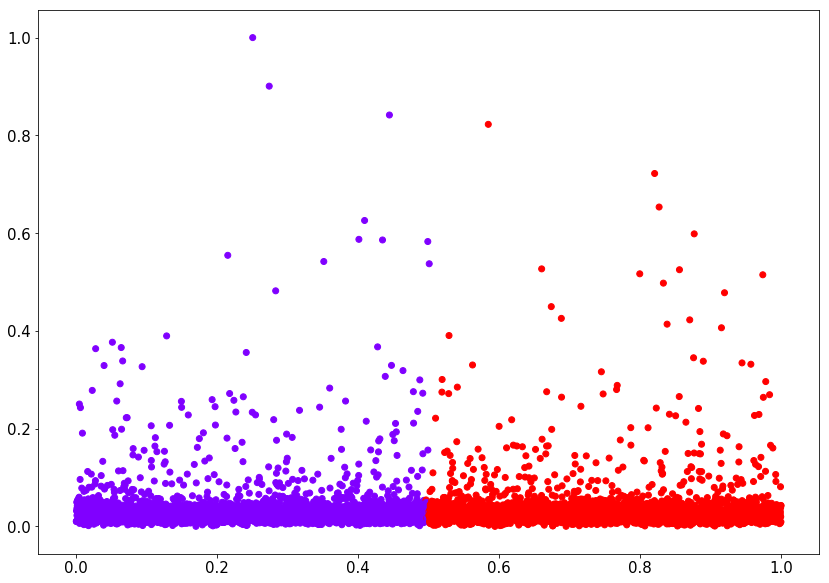

In [68]:
plt.figure(figsize = (14,10))
plt.scatter(df_transformed2[:,0],df_transformed2[:,1], c=km2.labels_, cmap='rainbow')

<h3 style="color:#8B0000;">  Let's plot the points along with the centroid coordinates of each cluster to see how the centroid positions effects clustering:</h3>


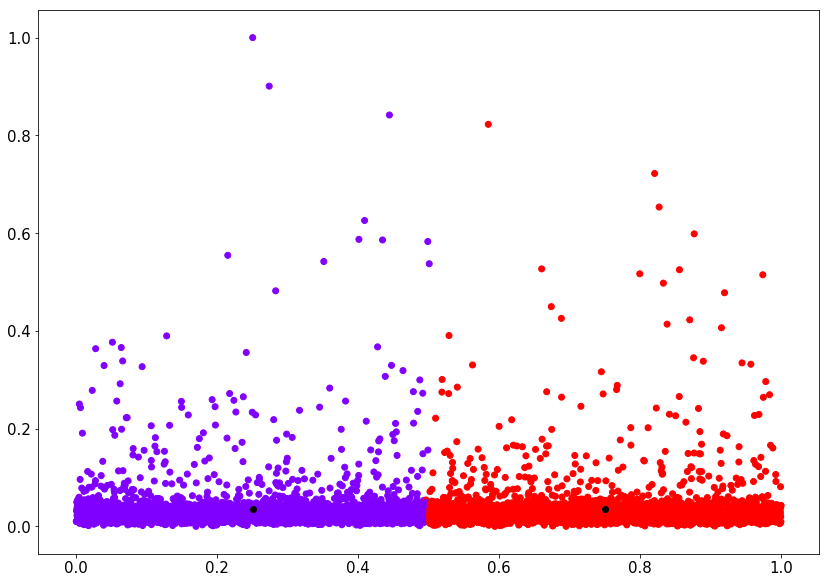

In [69]:
plt.figure(figsize = (14,10))
plt.scatter(df_transformed2[:,0], df_transformed2[:,1], c=km2.labels_, cmap='rainbow')
plt.scatter(km2.cluster_centers_[:,0] ,km2.cluster_centers_[:,1], color='black')

<h3 style="color:#8B0000;"> Principal Component Analysis (PCA) is a good option to visualize and interpret the clusters in 2d and 3d space:</h3>



In [70]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D 

In [71]:
pca = PCA(n_components=3)

df['x'] = pca.fit_transform(df_transformed)[:,0]
df['y'] = pca.fit_transform(df_transformed)[:,1]
df['z'] = pca.fit_transform(df_transformed)[:,2]

after_pca = pca.fit_transform(df_transformed)
after_pca

array([[-5.37415873e-02,  4.84861147e-02, -2.90902603e-02],
       [ 4.03697306e-02,  3.34378453e-01,  1.38824488e-02],
       [ 1.32357689e-01, -5.45208589e-02, -5.39056520e-02],
       ...,
       [-8.51744216e-02, -2.70027585e-02,  9.10689738e-03],
       [-1.14958140e-01,  2.55178908e-04, -3.93386567e-02],
       [-3.59585094e-02,  6.53642460e-03,  3.57613226e-03]])

<h3 style="color:#8B0000;"> PCA visualization of the clusters  in 2d space:</h3>



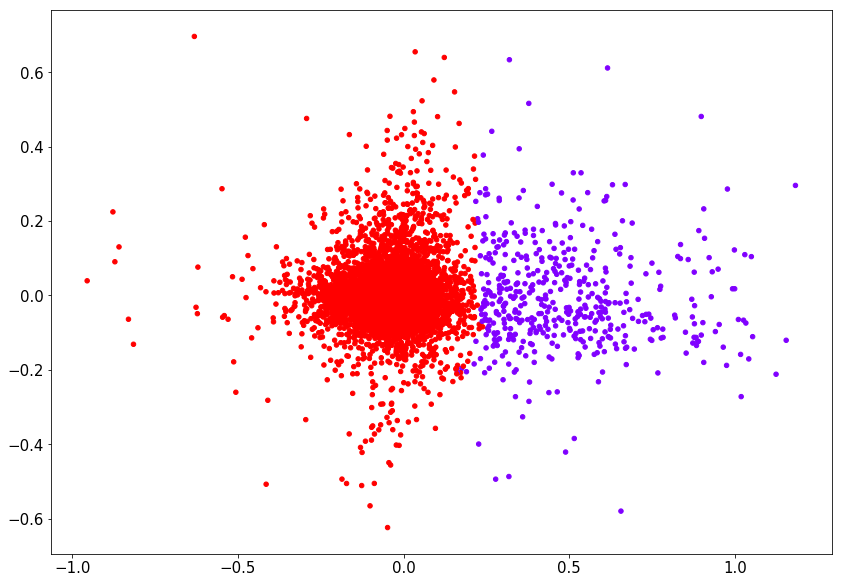

In [72]:
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
km = km.fit(df_transformed)
fig, ax = plt.subplots(figsize = (14,10))
fig.set_facecolor('w')
ax.scatter(after_pca[:, 0], after_pca[:, 1], s=20, c=km.labels_,cmap='rainbow')
plt.show()

<h3 style="color:#8B0000;"> PCA visualization of the clusters  in 3d space:</h3>



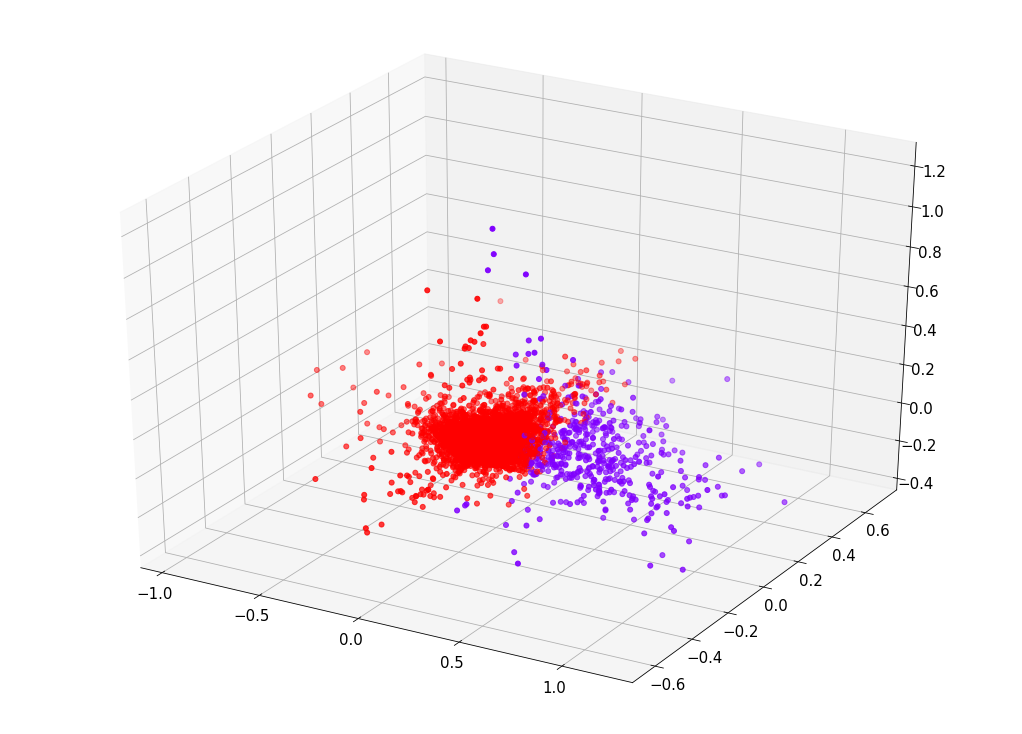

In [73]:
fig = plt.figure(figsize=(14,10))
fig.set_facecolor('w')
ax = Axes3D(fig)
ax.scatter(after_pca[:, 0], after_pca[:, 1], after_pca[:, 2], s=25, c=km.labels_,cmap='rainbow')

<h3 style="color:#8B0000;"> Assign the cluster value to each record of the data set:</h3>

In [74]:
labels = list(km.labels_)
clusters = pd.Series(labels, index=df.index) 

clusters.rename("cluster", inplace = True)
all_clusters =  pd.concat([df, clusters], axis=1)

df = all_clusters


<h3 style="color:#8B0000;"> How it looks like now with cluster column added:</h3>



In [75]:
df.head(10)

,Total KW,Average daily KW,% Monday,% Tuesday,% Wednesday,% Thursday,% Friday,% Saturday,% Sunday,% Weekday,% Weekend,% Winter Season,% Spring Season,% Summer Season,% Fall Season,x,y,z,cluster
Meter ID,,,,,,,,,,,,,,,,,,,
1000,5515.675000,10.290438,13.818961,14.649395,14.792587,12.848944,13.900039,15.455497,14.534576,70.009926,29.990074,30.476306,14.259488,21.492891,33.771315,-0.053742,0.048486,-0.029090,1
1001,5090.375000,9.496968,14.126091,14.361830,14.289969,14.611595,14.851637,13.891904,13.866974,72.241122,27.758878,50.429094,10.206615,13.299610,26.064681,0.040370,0.334378,0.013882,1
1002,5352.830000,9.986623,15.714585,14.486150,16.015827,15.183408,13.964968,12.886305,11.748757,75.364938,24.635062,24.733328,16.235954,25.775879,33.254839,0.132358,-0.054521,-0.053906,1
1003,16305.581000,30.420860,14.545051,14.048454,14.216507,14.363180,14.000151,14.630714,14.195943,71.173342,28.826658,26.021397,18.654803,22.251694,33.072106,-0.015600,-0.003586,-0.001263,1
1004,25326.442000,47.250825,14.630796,14.177041,14.400305,13.674076,12.893055,14.671563,15.553164,69.775273,30.224727,23.684286,15.229194,25.529978,35.556542,-0.063786,-0.062479,-0.009441,1
1005,16062.905000,29.968106,14.027581,14.594863,14.629533,13.514978,13.061610,13.851654,16.319782,69.828565,30.171435,31.946880,15.508895,19.026957,33.517269,-0.042013,0.086987,-0.024382,1
1006,11518.920000,21.490522,14.571218,14.276269,13.429141,14.079037,15.336368,15.040855,13.267112,71.692034,28.307966,35.736475,14.635634,16.073937,33.553953,0.003064,0.145294,0.020356,1
1007,18745.140277,34.972277,13.696249,13.230949,13.670252,13.675093,14.060668,17.003234,14.663555,68.333211,31.666789,25.275673,17.972786,24.637282,32.114260,-0.136175,-0.027780,0.033068,1
1008,18843.172172,35.155172,14.057596,14.723381,14.056635,13.365250,13.873179,14.188434,15.735526,70.076041,29.923959,28.941168,16.728436,21.143606,33.186790,-0.039376,0.036368,-0.007721,1


## Another way to illustrate the Silhouette Score:


In [76]:
def clustering(dataset, df_transformed, method, k):
    #dataset = pd.DataFrame(data = dataset[columns])
    if method == AgglomerativeClustering:
        cluster = method(k)
    else:
        cluster = method(k)
    dataset['cluster'] = cluster.fit(df_transformed).labels_
#     elif method == GaussianMixture:
#         dataset['cluster'] = cluster.fit_predict(df_transformed)
    labels = dataset['cluster']
    return cluster, labels
cluster, label = clustering(df, df_transformed, AgglomerativeClustering, 2)

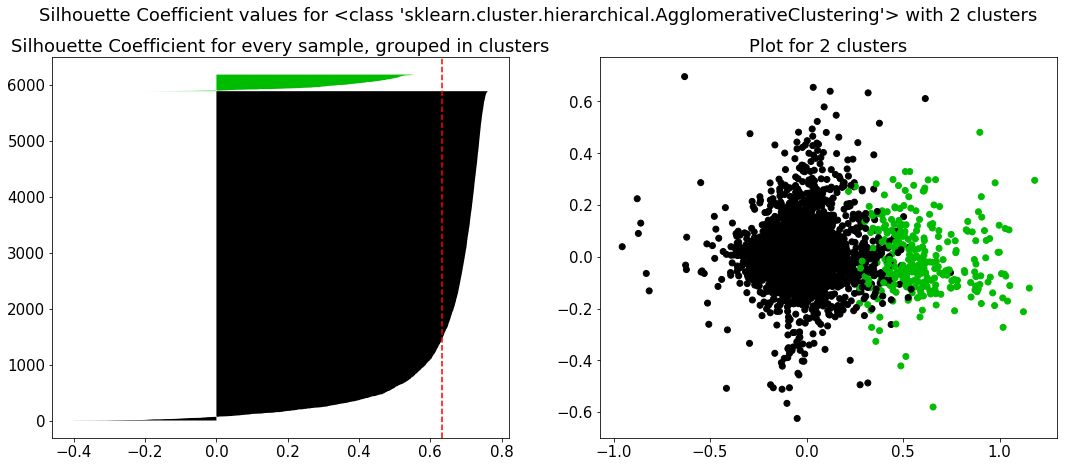

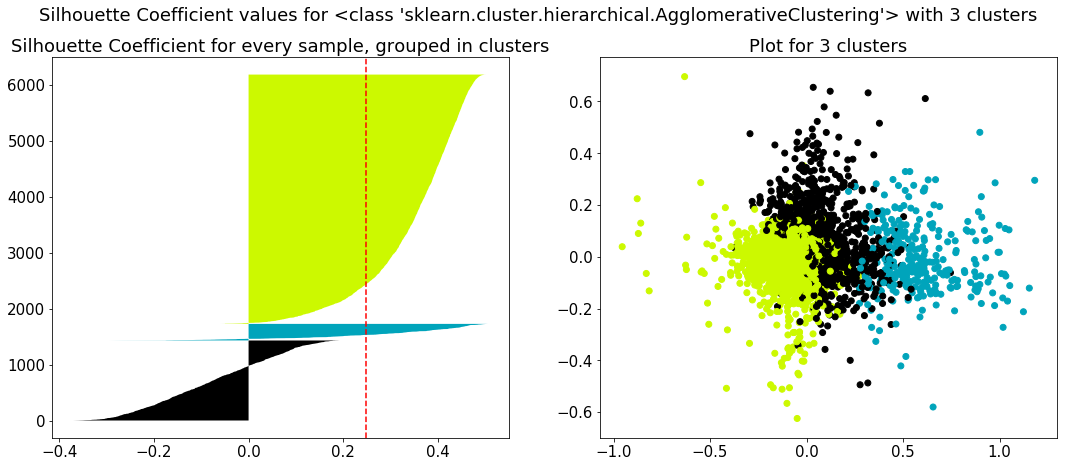

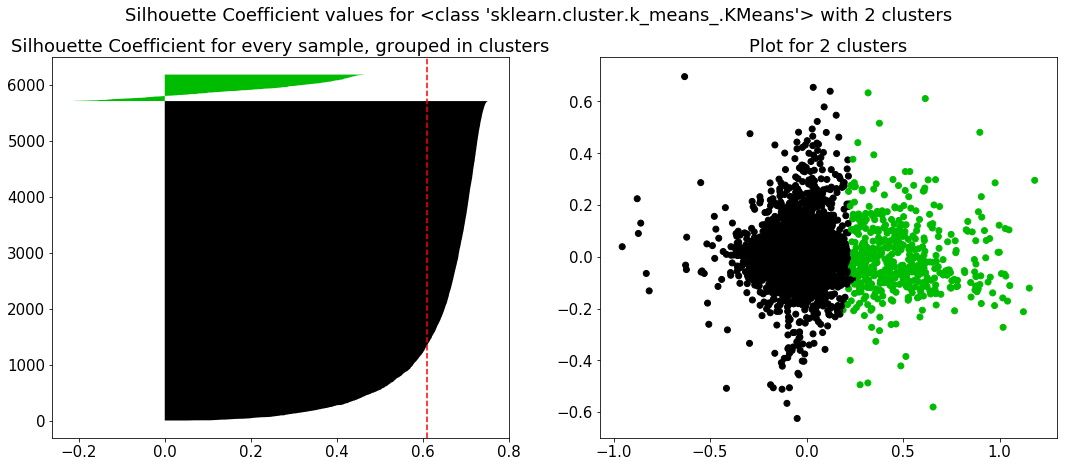

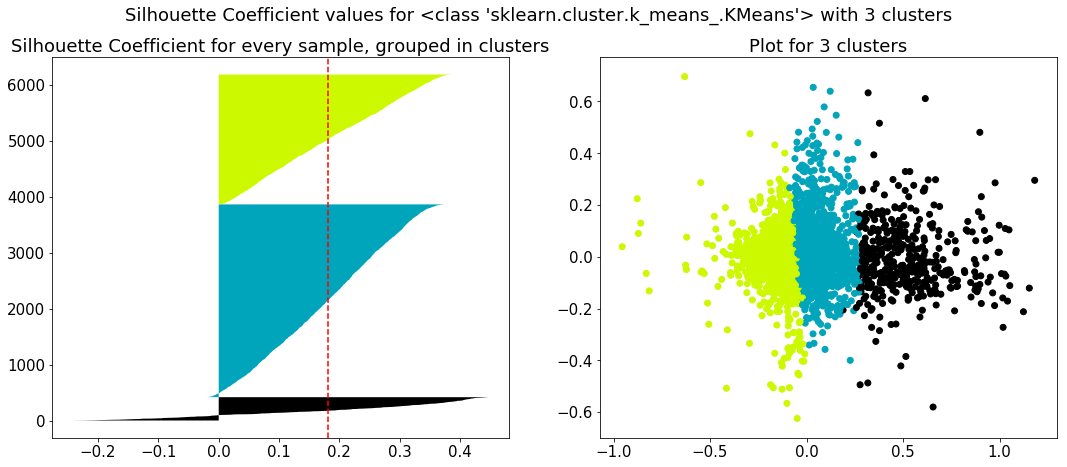

In [77]:
# Parts of this module is collected from SciKit:
# URL: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

methods = [AgglomerativeClustering, KMeans]
for method in methods:
    max_clusters = 4
    for n_clusters in range(2, max_clusters):
        # Declaring figures and subplots:
        fig, ax = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)
        fig.set_facecolor('w')

        # Calculate the labels:
        # Generate the labels list for the current cluster:
        cluster, label = clustering(df, df_transformed, method, n_clusters)

        # Find the Silhouette Coefficent average all the samples in the dataset:
        silhouette_avg = silhouette_score(df_transformed, label)

        # Using silhouette_samples to find the coefficents for all samples in matrix[x_calls] and with using
        # matrix['cluster'] as the label:
        df['coefficients'] = silhouette_samples(df_transformed, label)

        # Prints out the Coefficents values, grouped by cluster:
        y_lower = 0
        for i in range(n_clusters):
            #The 'i'th clusters dataset:
            ith_cluster_dataframe = df[label  == i][x_calls]
            
            # Gets all the silhouette coefficients for all the samples inside the ith cluster:
            ith_sample_silhouettes = df[label == i]['coefficients'].values
            ith_sample_silhouettes.sort(axis=0)
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax[0].fill_betweenx(range(y_lower, y_lower + ith_cluster_dataframe.shape[0]), ith_sample_silhouettes, facecolor=color)
            y_lower += ith_cluster_dataframe.shape[0]

        # The vertical line for average silhouette score of all the values
        ax[0].axvline(x=silhouette_avg, color="red", linestyle="--")

        # Plotting the dataset, colored by the clusters:
        colors = cm.nipy_spectral(label.astype(float) / n_clusters)
        ax[1].scatter(df['x'],df['y'],c=colors)

        # The last twerks for improving the visuals:
        ax[0].set_title('Silhouette Coefficient for every sample, grouped in clusters')
        ax[1].set_title('Plot for {} clusters'.format(n_clusters))
        plt.suptitle('Silhouette Coefficient values for {} with {} clusters'.format(method, n_clusters))

plt.show()

## Changing the cluster column to be our selected k clusters:


In [78]:
n_clusters = 2
method = AgglomerativeClustering

# Calculate the labels:
# Generate the labels list for the current cluster:
cluster, label = clustering(df, df_transformed, method, n_clusters)

<h3 style="color:#8B0000;"> Group the data by cluster value to see difference in two clusters along all the variables of the data frame:</h3>



In [79]:
var = df.groupby(['cluster']).mean()
var[x_calls]

,Total KW,Average daily KW,% Monday,% Tuesday,% Wednesday,% Thursday,% Friday,% Saturday,% Sunday,% Weekday,% Weekend,% Winter Season,% Spring Season,% Summer Season,% Fall Season
cluster,,,,,,,,,,,,,,,
0,16573.792225,30.921254,14.076337,14.246377,14.142998,14.062251,14.164333,14.683232,14.624472,70.692296,29.307704,27.316807,16.071473,22.998458,33.613261
1,48162.615597,89.855626,16.346957,18.363252,17.817078,17.475789,16.082602,7.593609,6.320713,86.085678,13.914322,28.290487,17.233538,20.418729,34.057246


## Number of customers on each cluster

In [80]:
unique, counts = np.unique(label, return_counts=True)
sum_of_clusters = dict(zip(unique, counts))
sum_of_clusters

{0: 5891, 1: 297}

### Cluster 0:
Relatively small total kW and daily average. Consumption is evenly divided between the days of the week. 

= Normal households
<br>
<br>
### Cluster 1:
Relatively large consumption based on total and daily average. Greater difference between weekdays and weekend, compare to the households. A slightly lower average consumption during the summer months.

= Companies

# Task 6
In order to find which group of customers has more predictable consumption behavior, use a machine learning algorithm to predict the total daily consumption of each cluster in the last 80 days of the dataset.

## Before using the prediciton model, we need to use the original dataset with dates as a column value

In [81]:
data_copy = data.copy()
data_copy.reset_index(inplace=True)
df_copy_clust = df.copy()
df_copy_clust.reset_index(inplace=True)
data_cluster = df_copy_clust[['Meter ID', 'cluster']]
data_copy.head()

Meter ID,date,1000,1001,1002,1003,1004,1005,1006,1007,1008,...,7435,7436,7437,7438,7439,7440,7441,7442,7443,7444
0,2009-07-14,11.203,6.744,6.355,24.183,50.057,17.765,12.056,30.399,27.217,...,15.643,36.500,15.346,0.732,138.130,41.813,14.491,36.813,5.112,52.940
1,2009-07-15,8.403,6.949,8.972,26.659,48.813,19.801,17.169,23.976,31.996,...,14.667,29.443,26.156,0.685,115.893,31.572,12.597,40.492,18.233,35.582
2,2009-07-16,7.225,7.255,8.794,32.017,32.555,15.216,16.260,34.534,24.363,...,18.037,28.786,23.945,0.707,127.698,32.618,15.816,41.487,6.925,29.307
3,2009-07-17,11.338,7.190,8.306,33.032,46.727,23.418,14.813,19.251,23.122,...,11.512,31.394,23.118,0.655,142.211,36.614,13.162,43.986,5.370,40.986
4,2009-07-18,11.306,6.805,10.119,31.238,35.215,29.392,12.325,21.392,25.721,...,30.767,22.112,15.582,0.682,4.641,27.982,13.301,41.018,6.751,40.270


## SARIMAX
SARIMAX is short for Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors model.
We gathered ideas for our solution from two websites. The URLs are: https://towardsdatascience.com/how-to-forecast-sales-with-python-using-sarima-model-ba600992fa7d
https://www.kaggle.com/zonnalobo/timeseries-segmentation-and-forecasting

In [82]:
import statsmodels.api as sm
from sklearn import metrics  

y=pd.DataFrame({'ds':pd.to_datetime(data.index)})

for k in range(len(unique)):
    data_clus=data_cluster[data_cluster['cluster']==k]
    del data_clus['cluster']
    s1="cluster "+str(k)
    y[s1]=0
    for i in list(data_clus.iloc[:,0]):
        y[s1]+=data_copy[i]

y.fillna(0, inplace=True)
y0=y[['ds','cluster 0']]
y0.columns=['date','cluster 0']
y0 = y0.set_index('date')

y1 = y[['ds','cluster 1']]
y1.columns=['date','cluster 1']
y1 = y1.set_index('date') 

ytot = pd.DataFrame({'ds':y['ds']})
ytot['y']= y0.values + y1.values
ytot.columns=['date','total clusters']
ytot = ytot.set_index('date') 

C:\Users\Hakon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Hakon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Users\Hakon\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


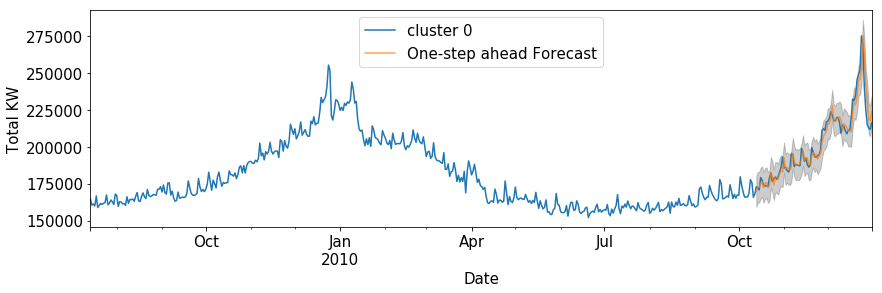

C:\Users\Hakon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Hakon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Users\Hakon\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


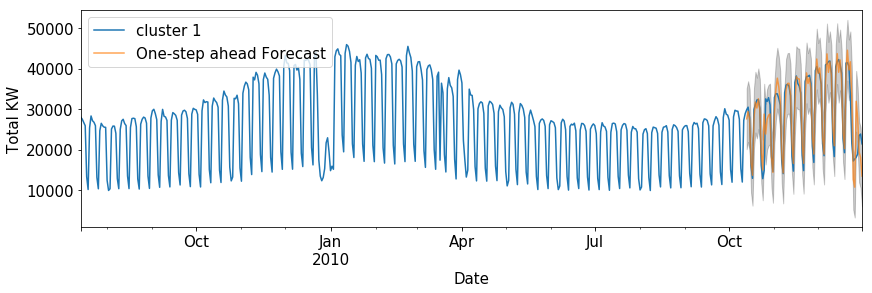

C:\Users\Hakon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Hakon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Users\Hakon\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


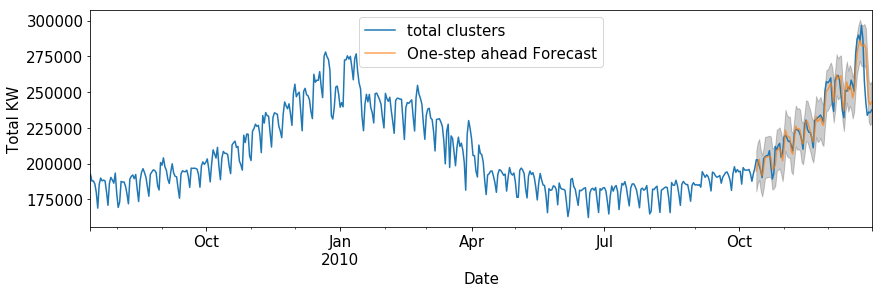

In [83]:
lst = [y0, y1, ytot]
def predict(lst):
    trainend = '2010-10-13'
    teststart = '2010-10-13'
    mape, rmse, df_testen, df_y_ = [], [], [], []
    for dataset in lst:
        test_y = dataset[teststart:]
        mod = sm.tsa.statespace.SARIMAX(dataset,
                                order=(7,1,7),
                                seasonal_order=(7,1,7, 1),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
        results = mod.fit()

        #plot
        pred = results.get_prediction(start=pd.to_datetime('2010-10-13'), dynamic=False)
        pred_ci = pred.conf_int()
        ax = dataset['2009':].plot(label='observed')
        pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
        ax.fill_between(pred_ci.index,
                        pred_ci.iloc[:, 0],
                        pred_ci.iloc[:, 1], color='k', alpha=.2)
        ax.set_xlabel('Date')
        ax.set_ylabel('Total KW')
        plt.legend()
        plt.show()

        prediction = results.predict(trainend, '2010-12-31')
        
        mape.append(metrics.mean_absolute_error(test_y, prediction))
        rmse.append(np.sqrt(metrics.mean_squared_error(test_y, prediction)))
        df_testen.append(prediction)
        df_y_.append(test_y)
    return mape, rmse, df_testen, df_y_
mape, rmse, df_testen, df_y_ = predict(lst)

# Task 7
Evaluate results of the prediction model using different measures such as RMSE and MAPE.

In [84]:
names = ['cluster 0', 'cluster 1', 'total clusters']
for i in range(len(lst)):
    print('For {}:'.format(names[i]))
    print('Mean Absolute Error:', mape[i])  
    print('Root Mean Squared Error:', rmse[i])

For cluster 0:
Mean Absolute Error: 4079.467784261309
Root Mean Squared Error: 6208.962825378677
For cluster 1:
Mean Absolute Error: 2769.793631714796
Root Mean Squared Error: 4015.5998232633856
For total clusters:
Mean Absolute Error: 5349.9991500255555
Root Mean Squared Error: 7995.252450537834


## Alternatively:
The below code does the following:
creating a new dataframe for each cluster, adding a column for each of the results of the original data "cluster X", and the predicted data "0". Then subract one from the other to see the difference between them, and since it became such a 'large' number, we decided to give it in percentage to show that the prediction isnt that far of in percentage

In [85]:
#printing the 
for i in range(len(lst)):
    df_clus = df_testen[i].copy()
    df_test_y = df_y_[i].copy()
    df_clus = df_clus.to_frame()
    df_test_y
    df_clus.reset_index(inplace=True)
    df_clus.rename(columns={'index':'date'}, inplace=True)
    df_test_y.reset_index(inplace=True)
    df_clus, df_test_y
    df_cluster__merged = pd.merge(df_clus, df_test_y, on='date')
    df_cluster__merged.set_index('date', inplace=True)
    #print(df_cluster__merged.columns)
    df_cluster__merged['diff'] = df_cluster__merged[0] - df_cluster__merged[names[i]]
    df_cluster__merged['diff %'] = ((df_cluster__merged[0] - df_cluster__merged[names[i]])/df_cluster__merged[0])*100
    print('\nCluster {}\n'.format(names[i]),df_cluster__merged)


Cluster cluster 0
                         0      cluster 0          diff    diff %
date                                                            
2010-10-13  169684.857689  172953.764323  -3268.906634 -1.926457
2010-10-14  172555.266064  172114.503334    440.762731  0.255433
2010-10-15  172623.642226  170780.698334   1842.943892  1.067608
2010-10-16  175381.719782  179139.998334  -3758.278552 -2.142914
2010-10-17  176339.139588  177420.579334  -1081.439745 -0.613273
2010-10-18  172418.026403  173551.994470  -1133.968067 -0.657685
2010-10-19  175138.089982  173691.988895   1446.101087  0.825692
2010-10-20  175695.765627  173335.299013   2360.466614  1.343497
2010-10-21  172266.541694  173458.173112  -1191.631419 -0.691737
2010-10-22  173543.710903  178892.851102  -5349.140198 -3.082301
2010-10-23  182762.029569  182277.843102    484.186467  0.264927
2010-10-24  179553.061538  176495.228102   3057.833437  1.703025
2010-10-25  174126.314728  178342.895102  -4216.580373 -2.421564
2010-


Cluster total clusters
                         0  total clusters          diff     diff %
date                                                              
2010-10-13  194981.661063   202791.907756  -7810.246693  -4.005631
2010-10-14  200662.552922   202604.695767  -1942.142845  -0.967865
2010-10-15  202923.759297   198639.617767   4284.141530   2.111207
2010-10-16  195486.444709   195155.092767    331.351942   0.169501
2010-10-17  191437.945303   190288.105767   1149.839536   0.600633
2010-10-18  196874.591663   203456.131903  -6581.540241  -3.343012
2010-10-19  204429.998327   204862.893328   -432.895001  -0.211757
2010-10-20  204590.498678   205602.784447  -1012.285769  -0.494786
2010-10-21  204914.108631   205822.514615   -908.405984  -0.443311
2010-10-22  205225.447035   209113.341604  -3887.894569  -1.894451
2010-10-23  204498.619791   198365.039604   6133.580187   2.999326
2010-10-24  196236.641535   189276.443604   6960.197931   3.546839
2010-10-25  196981.074268   193163.16